# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en estructuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [2]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web

import pandas as pd
import pandas_datareader.data as web


In [3]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Primero importaremos datos desde un archivo con extensión `.csv`

In [7]:
#Importar datos de un archivo csv

file_name = 'GOOG.csv'
data = pd.read_csv(file_name)
data.iloc[89,:]

Date         2015-08-25
Open             614.91
High             617.45
Low              581.11
Close            582.06
Adj Close        582.06
Volume          3538000
Name: 89, dtype: object

Ahora lo haremos desde Yahoo Finance

In [8]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [13]:
data2 = web.DataReader( name = 'GFNORTEO.MX', data_source = 'yahoo', start = '2015-04-20', end = '2020-04-20' )
data2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-20,89.110001,87.510002,89.110001,87.809998,8360102.0,74.981796
2015-04-21,89.089996,87.809998,87.879997,88.220001,4889502.0,75.331902
2015-04-22,88.849998,87.269997,88.849998,87.769997,6350768.0,74.947639
2015-04-23,87.949997,86.150002,87.510002,87.279999,4435224.0,74.529221
2015-04-24,87.949997,86.400002,87.690002,87.720001,4493704.0,74.904938
...,...,...,...,...,...,...
2020-04-14,67.489998,63.209999,67.000000,64.449997,8965119.0,64.449997
2020-04-15,64.000000,59.410000,63.810001,59.610001,16067198.0,59.610001
2020-04-16,61.970001,58.009998,59.000000,59.919998,15607618.0,59.919998


In [18]:
data2['Adj Close']

Date
2015-04-20    74.981796
2015-04-21    75.331902
2015-04-22    74.947639
2015-04-23    74.529221
2015-04-24    74.904938
                ...    
2020-04-14    64.449997
2020-04-15    59.610001
2020-04-16    59.919998
2020-04-17    63.470001
2020-04-20    63.779999
Name: Adj Close, Length: 1258, dtype: float64

In [22]:
# Escribir una función para generalizar la exportación desde Yahoo

def get_closes(names,start,end):
    close = web.DataReader(names,'yahoo', start, end)
    return close['Adj Close']



<function __main__.get_closes(names, start, end)>

In [33]:
# Instrumentos a descargar 

names = ['WMT.MX','BIMBOA.MX','BSMXB.MX']
# Fechas: inicios 2013 a finales de 2018


start = '2015-01-01'
end = '2019-12-31'

In [34]:
# Obtenemos los precios ajustados en el cierre

closes = get_closes(names,start,end)
closes


Symbols,WMT.MX,BIMBOA.MX,BSMXB.MX
Date,,,
2015-01-02,1271.624512,38.604809,NaN
2015-01-05,1271.624512,38.546562,NaN
2015-01-06,1279.031982,38.265064,NaN
2015-01-07,1294.641602,39.206646,NaN
2015-01-08,1311.720947,39.818188,NaN
...,...,...,...
2019-12-24,2289.958008,33.810001,26.010000
2019-12-26,2289.958008,33.740002,26.040001
2019-12-27,2254.074707,34.880001,25.850000


¿Cómo lucen estos datos?

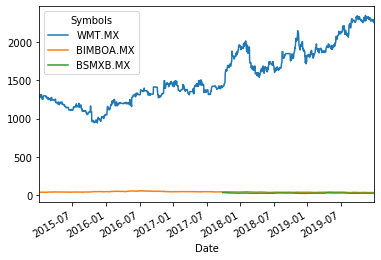

In [35]:
# Graficar
closes.plot()

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [37]:
# Método describe
closes.describe()


Symbols,WMT.MX,BIMBOA.MX,BSMXB.MX
count,1256.000000,1256.000000,566.000000
mean,1556.188869,42.768688,26.886640
std,367.854631,5.213731,2.078734
min,942.479980,32.830002,22.737309
25%,1268.799316,39.095111,25.368007
50%,1434.845459,41.997976,26.451841
75%,1855.103973,45.526080,28.310457
max,2347.020508,58.383011,33.815308


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [39]:
# Método shift

closes.shift()

Symbols,WMT.MX,BIMBOA.MX,BSMXB.MX
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,1271.624512,38.604809,NaN
2015-01-06,1271.624512,38.546562,NaN
2015-01-07,1279.031982,38.265064,NaN
2015-01-08,1294.641602,39.206646,NaN
...,...,...,...
2019-12-24,2289.958008,34.130001,26.760000
2019-12-26,2289.958008,33.810001,26.010000
2019-12-27,2289.958008,33.740002,26.040001


In [43]:
# Entonces los rendimientos se calculan como

Ret = (closes - closes.shift())/closes.shift() 


Ret = Ret.dropna()
Ret

Symbols,WMT.MX,BIMBOA.MX,BSMXB.MX
Date,,,
2017-09-28,0.000000,0.018523,0.007455
2017-09-29,0.000000,-0.000455,0.013154
2017-10-02,0.000000,0.012281,-0.004598
2017-10-03,0.011988,0.008537,0.001630
2017-10-04,0.000908,0.022054,-0.001628
...,...,...,...
2019-12-24,0.000000,-0.009376,-0.028027
2019-12-26,0.000000,-0.002070,0.001153
2019-12-27,-0.015670,0.033788,-0.007296


In [9]:
# Método pct_change


y la gráfica de los rendimientos se puede obtener como...

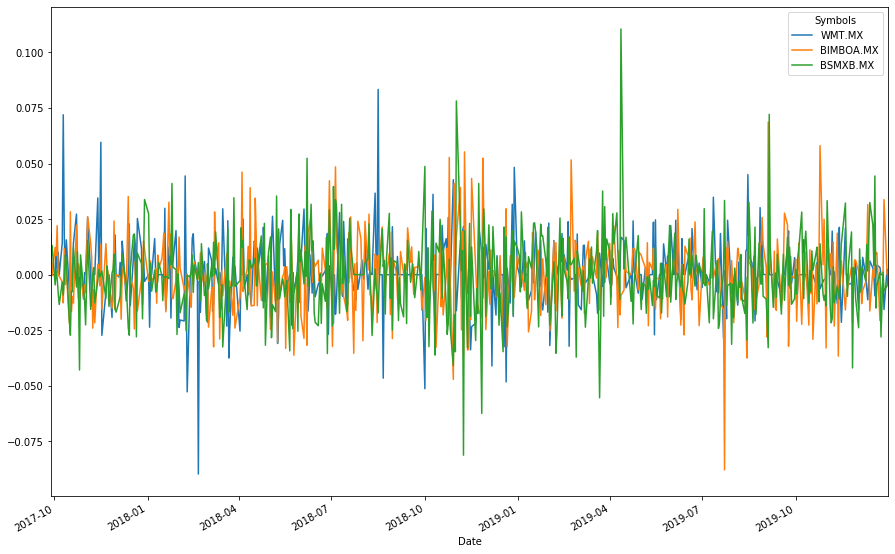

In [44]:
# Gráfica
Ret.plot(figsize = (15,10))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [46]:
# Rendimiento logarítmico
Ret_log = np.log(closes/closes.shift()).dropna()
Ret_log

Symbols,WMT.MX,BIMBOA.MX,BSMXB.MX
Date,,,
2017-09-28,0.000000,0.018354,0.007427
2017-09-29,0.000000,-0.000455,0.013068
2017-10-02,0.000000,0.012206,-0.004609
2017-10-03,0.011917,0.008501,0.001629
2017-10-04,0.000907,0.021814,-0.001629
...,...,...,...
2019-12-24,0.000000,-0.009420,-0.028427
2019-12-26,0.000000,-0.002073,0.001153
2019-12-27,-0.015794,0.033230,-0.007323


In [48]:
# Gráfica
subplot
Ret_log.plot(figsize = (15,10))


NameError: name 'subplot' is not defined

In [49]:
# Valor absoluto de la diferencia
np.abs(Ret-Ret_log)


Symbols,WMT.MX,BIMBOA.MX,BSMXB.MX
Date,,,
2017-09-28,0.000000e+00,1.694612e-04,2.764771e-05
2017-09-29,0.000000e+00,1.034525e-07,8.576488e-05
2017-10-02,0.000000e+00,7.480086e-05,1.060442e-05
2017-10-03,7.129165e-05,3.623781e-05,1.327808e-06
2017-10-04,4.115851e-07,2.396715e-04,1.326367e-06
...,...,...,...
2019-12-24,0.000000e+00,4.423049e-05,4.002500e-04
2019-12-26,0.000000e+00,2.146208e-06,6.646881e-07
2019-12-27,1.240699e-04,5.582664e-04,2.674956e-05


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [14]:
# Media y volatilidad de rendimientos


In [53]:
mu = Ret.mean()
mu

Symbols
WMT.MX       0.000926
BIMBOA.MX   -0.000216
BSMXB.MX    -0.000297
dtype: float64

In [54]:
sigma = Ret.std()
sigma

Symbols
WMT.MX       0.014649
BIMBOA.MX    0.016083
BSMXB.MX     0.017438
dtype: float64

In [55]:
mu['WMT.MX'], sigma['BSMXB.MX']

(0.0009263220485007133, 0.017437614731579697)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>